<a href="https://colab.research.google.com/github/andrewseltzer99/Modeling-Company-Financial-Data-to-Predict-Bankruptcy/blob/main/Final_Seltzer_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

LINK TO MEDIUM: https://aaseltze.medium.com/using-machine-learning-regression-analysis-to-predict-company-bankruptcy-5291edf3a9d2

LINK TO DATASET: https://github.com/andrewseltzer99/Modeling-Company-Financial-Data-to-Predict-Bankruptcy/blob/main/data.csv

LINK TO REPO: https://github.com/andrewseltzer99/Modeling-Company-Financial-Data-to-Predict-Bankruptcy

In [ ]:
# Start solution here
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.patches as mpatches


In [ ]:
data = pd.read_csv('data.csv', header=0, index_col=0, parse_dates=[0], squeeze=True)
data.head()

,ROA(B) before interest and depreciation after tax,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Revenue Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Total Asset Turnover,Accounts Receivable Turnover,Net Worth Turnover Rate (times),Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Total income/Total expense,Current Liability to Current Assets,Net Income to Total Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL)
Bankrupt?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.405750,0.601457,0.998969,0.302646,0.458143,0.000725,0.147950,0.169141,0.017560,0.138736,0.000327,0.002259,0.001208,0.629951,0.021266,0.792424,0.390284,0.137757,0.086957,0.001814,0.032903,0.672775,0.004094,0.147308,0.002022,0.118250,0.716845,0.622879,0.827890,0.026601
1,0.516730,0.610235,0.998946,0.303556,0.461867,0.000647,0.182251,0.208944,0.021144,0.169918,0.000443,0.006016,0.004039,0.635172,0.012502,0.828824,0.376760,0.168962,0.064468,0.001286,0.025484,0.751111,0.014948,0.056963,0.002226,0.047775,0.795297,0.623652,0.839969,0.264577
1,0.472295,0.601364,0.998857,0.302035,0.458521,0.000790,0.177911,0.180581,0.005944,0.142803,0.000396,0.011543,0.005348,0.629631,0.021248,0.792484,0.379093,0.148036,0.014993,0.001495,0.013387,0.829502,0.000991,0.098162,0.002060,0.025346,0.774670,0.623841,0.836774,0.026555
1,0.457733,0.583541,0.998700,0.303350,0.465705,0.000449,0.154187,0.193722,0.014368,0.148603,0.000382,0.004194,0.002896,0.630228,0.009572,0.848535,0.379743,0.147561,0.089955,0.001966,0.028065,0.725754,0.018851,0.098715,0.001831,0.067250,0.739555,0.622929,0.834697,0.026697
1,0.522298,0.598783,0.998973,0.303475,0.462746,0.000686,0.167502,0.212537,0.029690,0.168412,0.000439,0.006022,0.003727,0.636055,0.005150,0.893491,0.375025,0.167461,0.175412,0.001449,0.040161,0.751822,0.014161,0.110195,0.002224,0.047725,0.795016,0.623521,0.839973,0.024752


In [ ]:
# Here I am balancing my data via downsampling
from sklearn.utils import resample
df_majority = data[data.index==0]
df_minority = data[data.index==1]
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1000,     
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.index
print(len(X)) # both X and Y are now the same length
print(len(y))

1220
1220


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
dummyPredict = dummy_classifier.predict(X_test)


print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.819672131147541


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


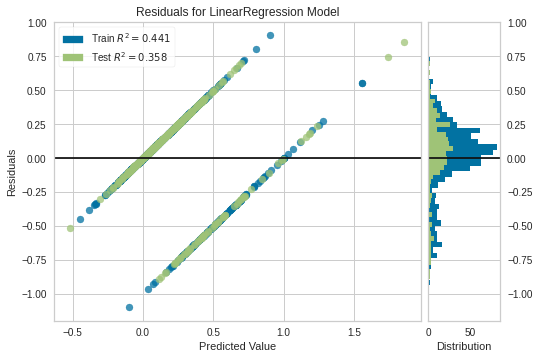

In [ ]:
#Let's plot residuals
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test) # test values are more accurate, but there are also less of them
visualizer.poof();


In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
model_rf = RandomForestClassifier(n_estimators=200, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
print("\t\tRandom Forest Model Accuracy:", accuracy_score(y_test, predict_rf))

# calculate most important features
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
imp = df.sort_values(by = 1, ascending=False)
print("\n\t\tTen most important factors:\n",imp[0:10])


		Random Forest Model Accuracy: 0.912568306010929

		Ten most important factors:
                                                     0         1
7             Persistent EPS in the Last Four Seasons  0.092379
14                         Total debt/Total net worth  0.090418
10                              Net Value Growth Rate  0.072771
16                               Borrowing dependency  0.067058
15                                   Net worth/Assets  0.056396
6                             Net Value Per Share (B)  0.051929
0    ROA(B) before interest and depreciation after...  0.038305
26                         Net Income to Total Assets  0.037145
17              Net profit before tax/Paid-in capital  0.037028
12                                        Quick Ratio  0.036205


In [ ]:
print('Classification Report:\n')
print(classification_report(y_test, predict_rf)) 
# precision - what percentage of the predictions were correct
# recall - just the fraction of positives that were correctly predicted


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       300
           1       0.76      0.76      0.76        66

    accuracy                           0.91       366
   macro avg       0.85      0.85      0.85       366
weighted avg       0.91      0.91      0.91       366



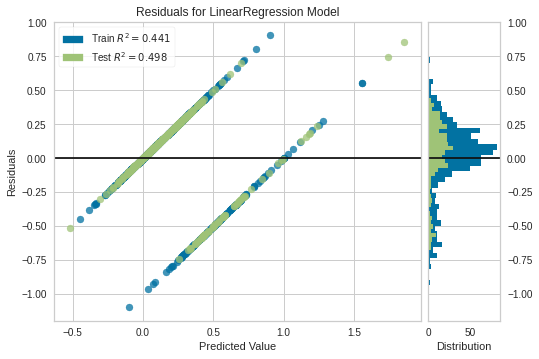

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer1 = ResidualsPlot(linear_model)
visualizer1.fit(X_train, y_train)
visualizer1.score(X_test, predict_rf) # test values are more accurate, but there are also less of them
visualizer1.poof();

Confusion Matrix
 [[284  16]
 [ 16  50]]


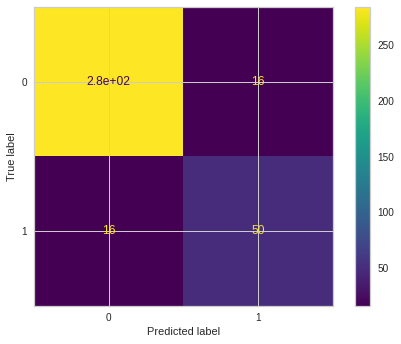

In [ ]:
from sklearn import metrics
cf = metrics.confusion_matrix(y_test, predict_rf)
print("Confusion Matrix\n",cf)
metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

In [ ]:
# BAGGING MODEL

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

model_bagging = BaggingClassifier(n_estimators=20, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

 Accuracy =  0.9207650273224044
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       300
           1       0.79      0.76      0.78        66

    accuracy                           0.92       366
   macro avg       0.87      0.86      0.86       366
weighted avg       0.92      0.92      0.92       366



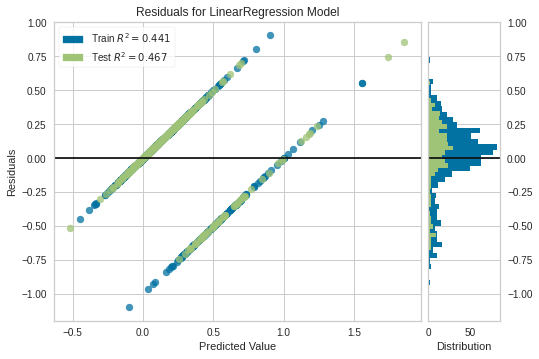

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, pred_bagging) # test values are more accurate, but there are also less of them
visualizer.poof();

Confusion Matrix
 [[287  13]
 [ 16  50]]


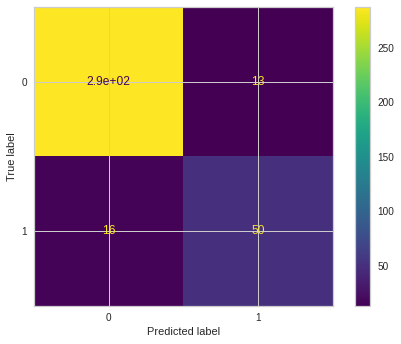

In [ ]:
cf = metrics.confusion_matrix(y_test, pred_bagging)
print("Confusion Matrix\n",cf)
metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.show()

In [ ]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = np.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", np.round(np.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", np.round(np.array(scores).std(), 5))
    print("Range:\t\t\t\t", np.round(np.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {np.round(recall_score(y_test, ensemble_preds), 5)}')

In [ ]:
print_recall_scores(model_bagging, X_test, y_test)

Recall for Base Model 1:	 0.74242
----------------------------------------
Recall for Base Model 2:	 0.57576
----------------------------------------
Recall for Base Model 3:	 0.57576
----------------------------------------
Recall for Base Model 4:	 0.65152
----------------------------------------
Recall for Base Model 5:	 0.59091
----------------------------------------
Recall for Base Model 6:	 0.59091
----------------------------------------
Recall for Base Model 7:	 0.62121
----------------------------------------
Recall for Base Model 8:	 0.72727
----------------------------------------
Recall for Base Model 9:	 0.69697
----------------------------------------
Recall for Base Model 10:	 0.68182
----------------------------------------
Recall for Base Model 11:	 0.65152
----------------------------------------
Recall for Base Model 12:	 0.65152
----------------------------------------
Recall for Base Model 13:	 0.65152
----------------------------------------
Recall for Base Model

In [ ]:
# AdaBoost Classification
# Enter your code here
# boosting model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth =3) # mess around w/ parameters
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)
boosty = ada_boost1.predict(X_test)

print("AdaBoost Model Accuracy",accuracy_score(y_test, ada_boost1.predict(X_test)))

# calculate most important features according to model
feature_importances = ada_boost1.feature_importances_
features = X_train.columns
df2 = pd.DataFrame(zip(X_train.columns, ada_boost1.feature_importances_))
imp = df2.sort_values(by = 1, ascending=False)
print("Top 10 most important factors \n",imp[0:10])

AdaBoost Model Accuracy 0.9016393442622951
Top 10 most important factors 
                                            0         1
13                    Interest Expense Ratio  0.076414
12                               Quick Ratio  0.069031
7    Persistent EPS in the Last Four Seasons  0.066439
14                Total debt/Total net worth  0.063249
19              Accounts Receivable Turnover  0.062331
5        Interest-bearing debt interest rate  0.060157
4                             Cash flow rate  0.056174
24                Total income/Total expense  0.051104
16                      Borrowing dependency  0.046774
1                Realized Sales Gross Margin  0.046032


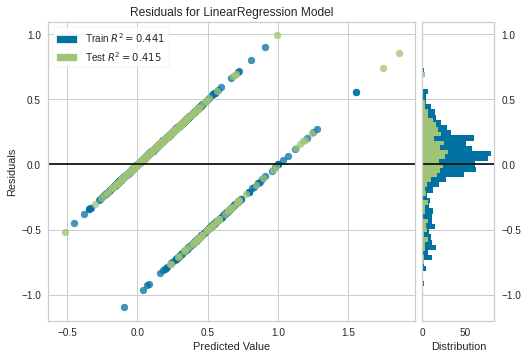

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, boosty) # test values are more accurate, but there are also less of them
visualizer.poof();

In [ ]:
print('Classification Report:\n')
print(classification_report(y_test, boosty))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       300
           1       0.76      0.67      0.71        66

    accuracy                           0.90       366
   macro avg       0.84      0.81      0.83       366
weighted avg       0.90      0.90      0.90       366



Confusion Matrix
 [[286  14]
 [ 22  44]]


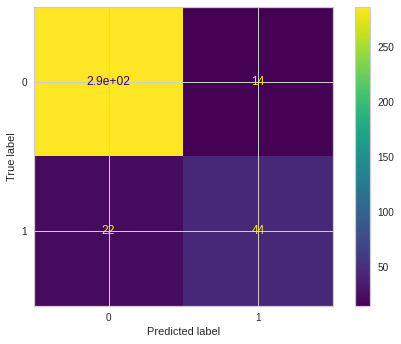

In [ ]:
cf = metrics.confusion_matrix(y_test, boosty)
print("Confusion Matrix\n",cf)
metrics.plot_confusion_matrix(ada_boost1, X_test, y_test)
plt.show()

In [ ]:
print_recall_scores(ada_boost1, X_test, y_test)

Recall for Base Model 1:	 0.65152
----------------------------------------
Recall for Base Model 2:	 0.71212
----------------------------------------
Recall for Base Model 3:	 0.71212
----------------------------------------
Recall for Base Model 4:	 0.69697
----------------------------------------
Recall for Base Model 5:	 0.68182
----------------------------------------
Recall for Base Model 6:	 0.68182
----------------------------------------
Recall for Base Model 7:	 0.71212
----------------------------------------
Recall for Base Model 8:	 0.63636
----------------------------------------
Recall for Base Model 9:	 0.65152
----------------------------------------
Recall for Base Model 10:	 0.69697
----------------------------------------
Recall for Base Model 11:	 0.72727
----------------------------------------
Recall for Base Model 12:	 0.60606
----------------------------------------
Recall for Base Model 13:	 0.62121
----------------------------------------
Recall for Base Model

In [ ]:
# voting classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# mess arround w/ the training classifiers
# random Forest Classifier
rfClf = RandomForestClassifier(n_estimators=200) # 

# support vectory machine
svmClf = SVC(probability=True) # probability calculation

# logistic regression
logClf = LogisticRegression()

#decision tree classifier
dtree = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=2020)


# constructing the ensemble classifier by mentioning the individual classifiers.
clf2 = VotingClassifier(estimators=[('rf',rfClf), ('svm',svmClf), ('log',logClf), ('dtClf',dtree)], voting='soft') 

# train the ensemble classifier
clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)
print('Accuracy score', accuracy_score(y_test, clf2_pred))

Accuracy score 0.8961748633879781


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# mess arround w/ the training classifiers
# random Forest Classifier
rfClf = RandomForestClassifier(n_estimators=200, max_features=7, random_state=42) # 

# support vectory machine
svmClf = SVC(probability=True) # probability calculation

base_est = DecisionTreeClassifier (max_depth =3) # mess around w/ parameters
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.05)

#decision tree classifier
dtree = DecisionTreeClassifier(max_depth=5, criterion="entropy", random_state=2020)

model_bagging = BaggingClassifier(n_estimators=20, random_state = 42)

# constructing the ensemble classifier by mentioning the individual classifiers.
clf3 = VotingClassifier(estimators=[('rf',rfClf), ('svm',svmClf), ('bagging',model_bagging), ('dtree',dtree)], voting='soft') 

# train the ensemble classifier
clf3.fit(X_train, y_train)

clf3_pred = clf3.predict(X_test)
print('Accuracy score', accuracy_score(y_test, clf3_pred))

Accuracy score 0.907103825136612


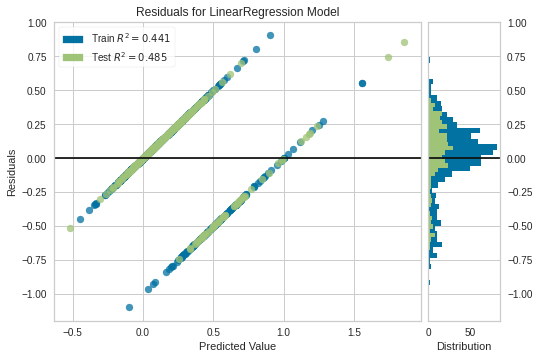

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
visualizer = ResidualsPlot(linear_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, clf3_pred) # test values are more accurate, but there are also less of them
visualizer.poof();

In [ ]:
print('Classification Report:\n')
print(classification_report(y_test, clf3_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       300
           1       0.77      0.70      0.73        66

    accuracy                           0.91       366
   macro avg       0.85      0.83      0.84       366
weighted avg       0.90      0.91      0.91       366



Confusion Matrix
 [[286  14]
 [ 20  46]]


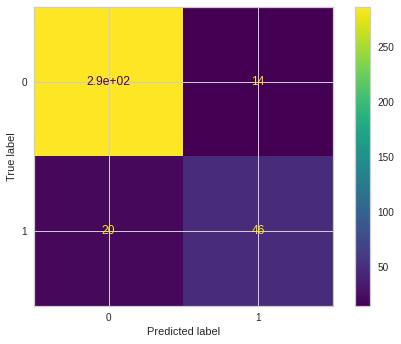

In [ ]:
cf = metrics.confusion_matrix(y_test, clf3_pred)
print("Confusion Matrix\n",cf)
metrics.plot_confusion_matrix(clf3, X_test, y_test)
plt.show()

In [ ]:
print_recall_scores(clf2, X_test, y_test)

Recall for Base Model 1:	 0.71212
----------------------------------------
Recall for Base Model 2:	 0.0
----------------------------------------
Recall for Base Model 3:	 0.98485
----------------------------------------
Recall for Base Model 4:	 0.72727
Mean Recall Score:		 0.60606
Std Deviation:			 0.36631
Range:				 0.98485
Overall Recall for model:	 0.60606


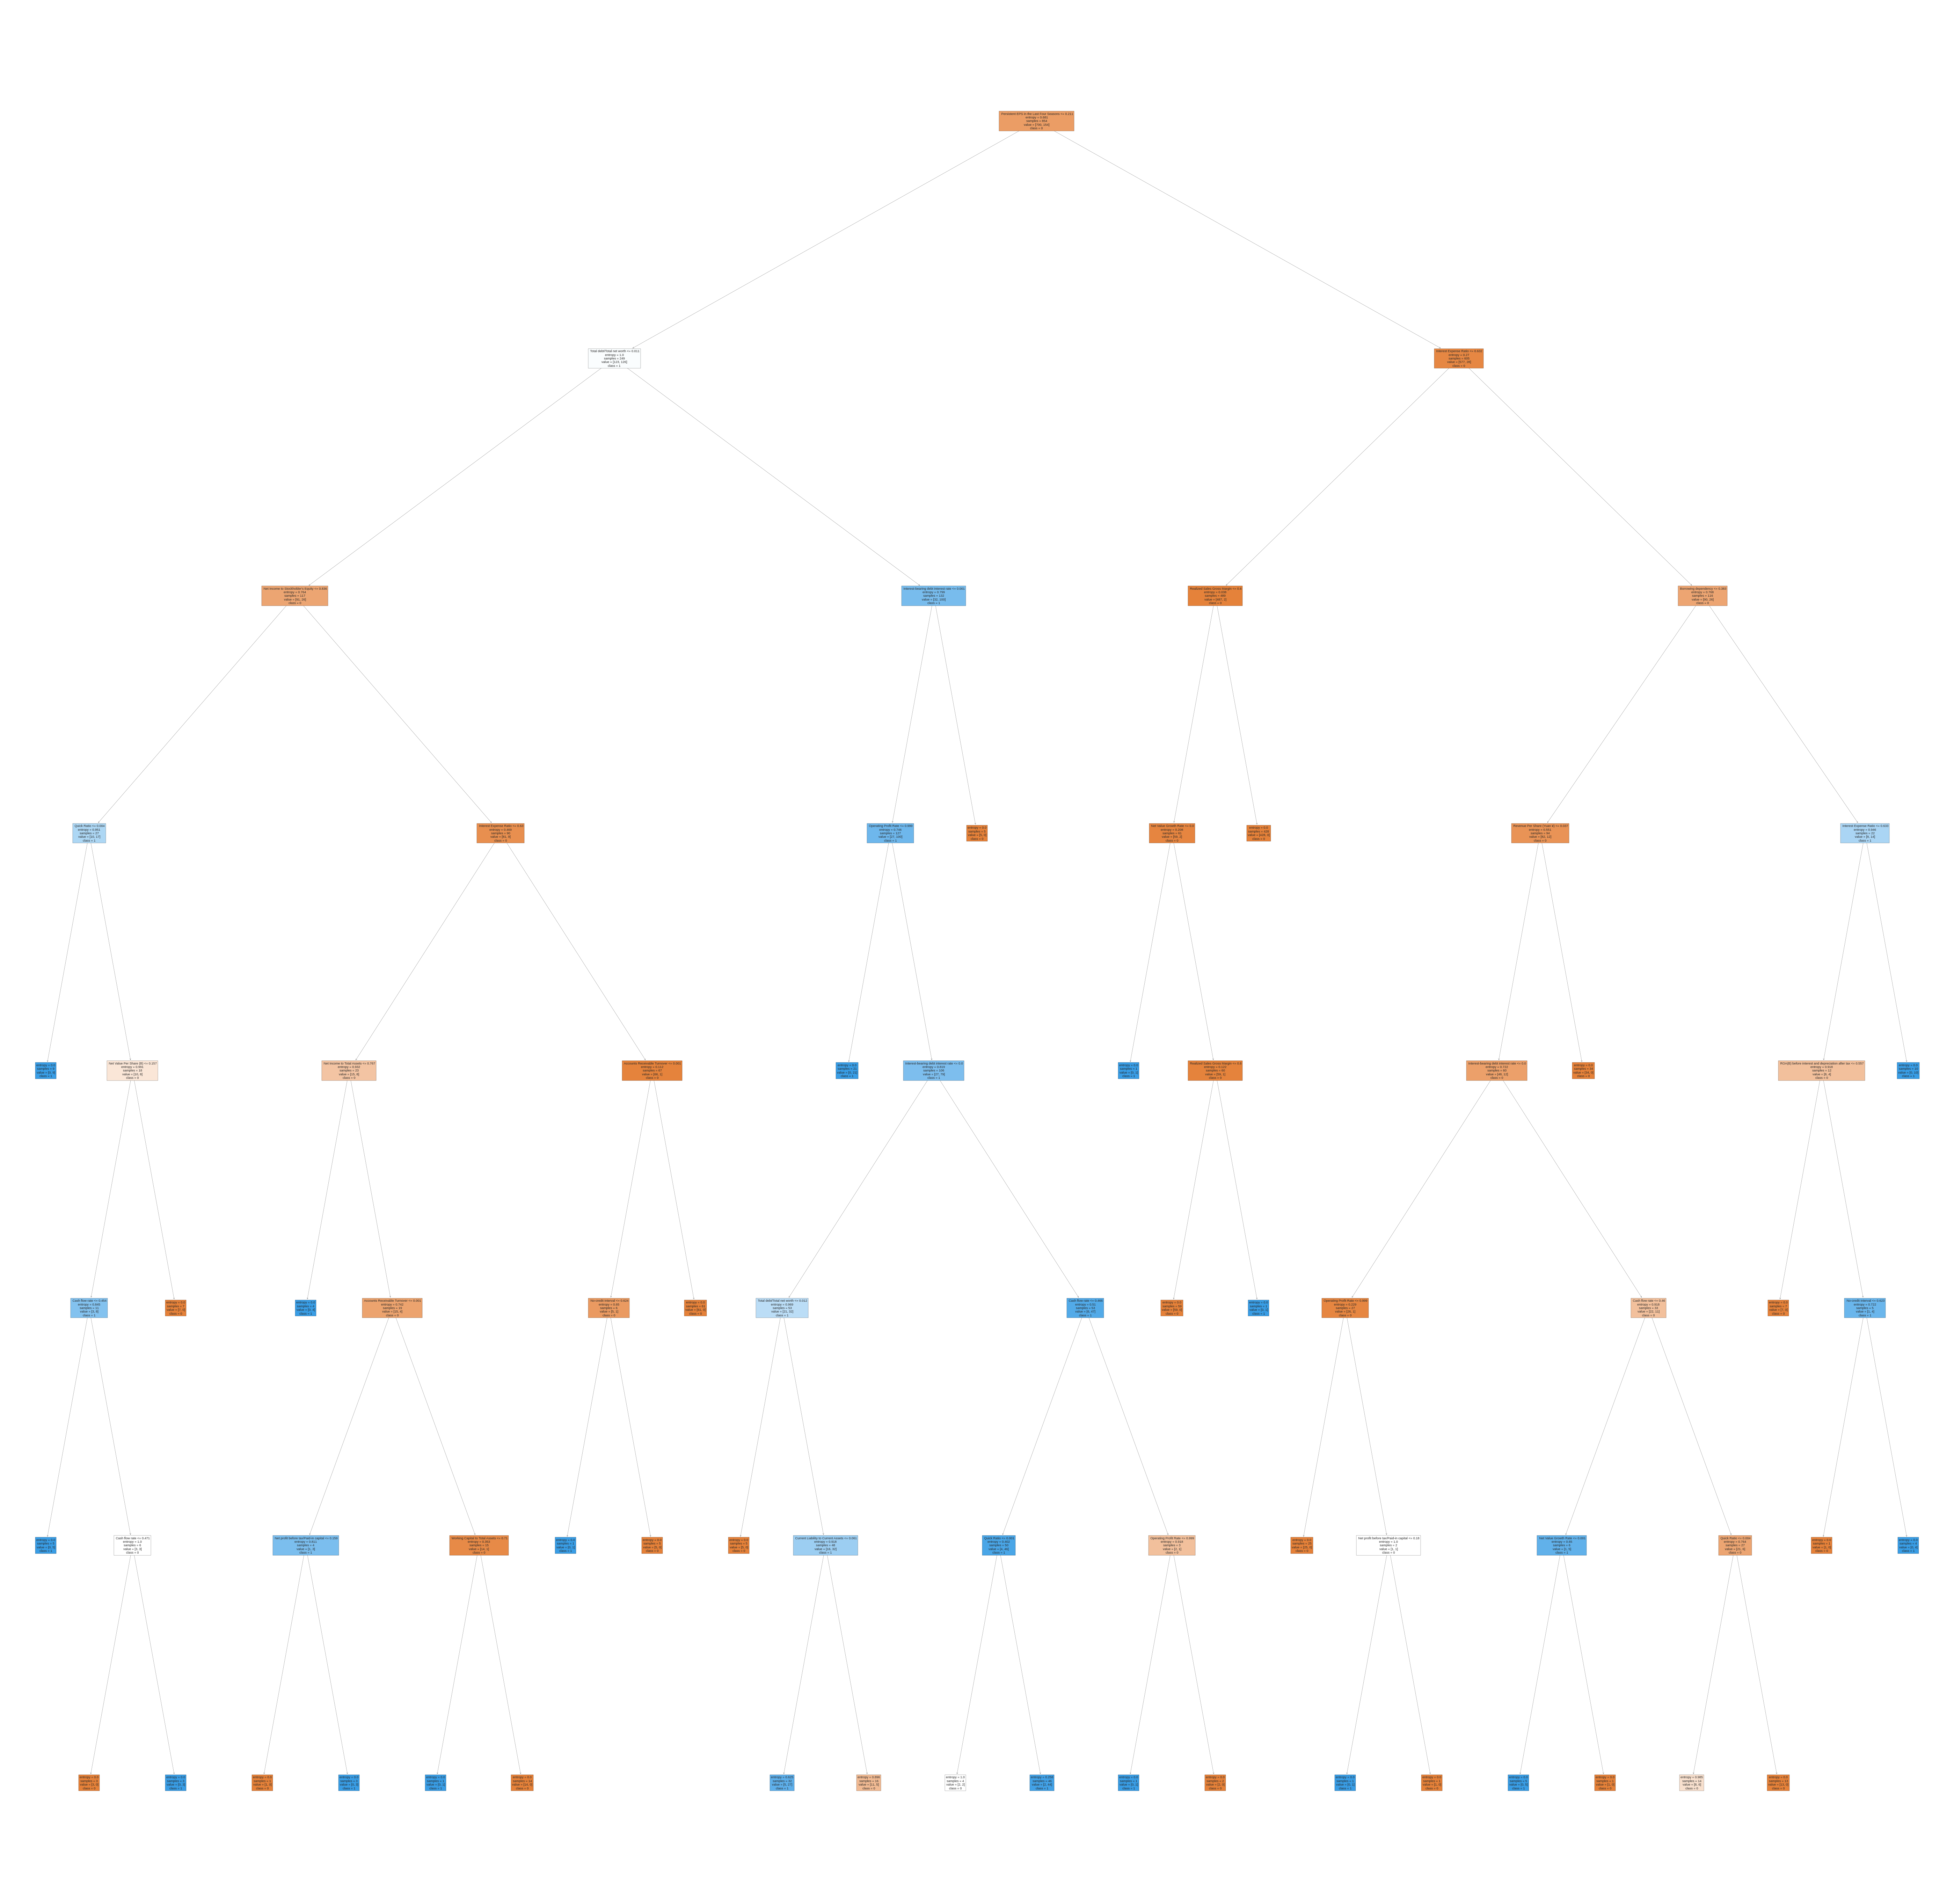

In [ ]:
# make and show decision tree classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=7, criterion="entropy", random_state=2020)
dt.fit(X_train,y_train)
ypred = dt.predict(X_test)

fn = X.columns

plt.figure(figsize=(100,100))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

In [ ]:
#using Lasso to find the best alpha
# what can this be used for???
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

alpha_user = 0.01 #play with alpha and you will get different results (between 0 and 1)
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_coef = lasso_model.coef_

#How do we choose the right alpha?
#This is where the validation dataset comes in!
alpha_space = np.logspace(-4, 0, 50)
model_scores = []

lasso_model = Lasso(normalize=True) #same for Ridge
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X_train,y_train,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))

best_alpha_index = np.argmax(model_scores)
print("best alpha is:", alpha_space[best_alpha_index])
#print(np.argmax(model_scores))

best alpha is: 0.0006551285568595509


In [ ]:
def score(y_pred, y_true):
  error = np.square(np.log10(y_pred + 1)-np.log10(y_true+1)).mean()**.5
  score = 1 - error
  return score

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=alpha_space[best_alpha_index])
lasso_reg.fit(X_train,y_train)
y_pred_lass = lasso_reg.predict(X_test)

rows = y_test.values
x = X_test.values

print('Lasso accuracy score:', score(rows, y_pred_lass))
from sklearn.metrics import r2_score
print("R^2 score:",r2_score(rows, y_pred_lass))

Lasso accuracy score: 0.9037547057224022
R^2 score: 0.38101077718088416
